In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples, chains
from getdist import *

import planckStyle
import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


/home/isidro/CosmoMC/python/getdist/plots.py:11: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


In [12]:
#dir_name = '/home/isidro/SuperMC/chains/owaChains1'
#dir_name = '/home/isidro/SuperMC_fork_20nov/april/chains'
dir_name = '/home/isidro/SuperMC_/chains'

roots = ['mcmc_SN+HD+BBAO+Planck',    
        'owaCDM_phy_SN+HD+BBAO+Planck_nested_[22:48:04]_dynesty_multi_1000',
        'owaCDM_phy_SN+HD+BBAO+Planck_nested_[18:32:06]_dynesty_multi_1048',
        'owaCDM_phy_SN+HD+BBAO+Planck_nested_[18:34:55]_dynesty_cubes_1048',
        'owaCDM_phy_SN+HD+BBAO+Planck_nested_[18:33:36]_dynesty_balls_1048']


In [15]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.0})

<Figure size 720x648 with 0 Axes>

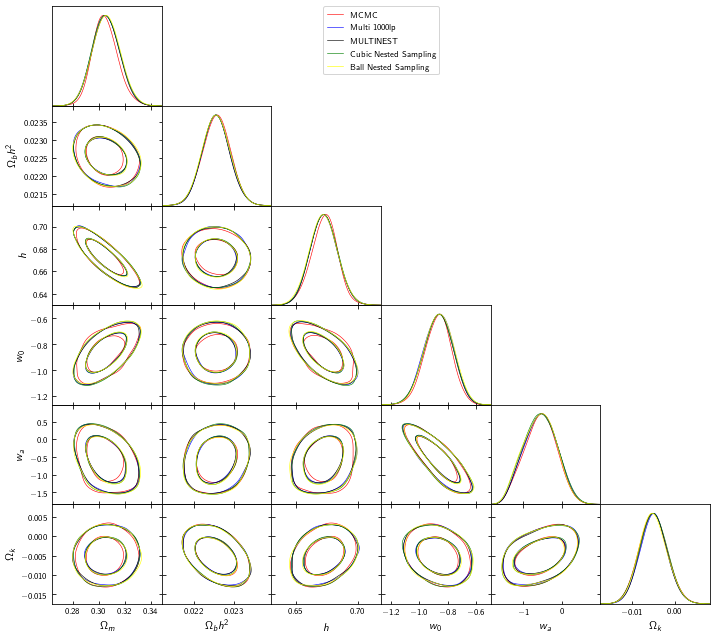

In [16]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 12
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'

#g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
#                
#                filled = False, nx=1, alphas=[0.7], 
#                colors=['red','blue','black','green','yellow'],
                #legend_labels=['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI'], 
                #normalized=False, shaded=False)

g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
                diag1d_kwargs={'colors':['red','blue','black','green','yellow']},
                colors=['red','blue','black','green','yellow'],
                legend_labels=['MCMC', 'Multi 1000lp',
                               'MULTINEST', 'Cubic Nested Sampling', 
                               'Ball Nested Sampling'], 
                filled = False, 
                normalized=False, shaded=False)
        

#plt.savefig('samplersTriangledynesty.png', dpi=300)
plt.show()

# Probando análisis con Getdist

Generate a MCSample object

In [5]:
MHsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[0], settings={'ignore_rows':0.2})
ENSsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[1], settings={'ignore_rows':0.2})
MULTINESTsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[2], settings={'ignore_rows':0.2})
SBAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[3], settings={'ignore_rows':0.2})
BAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[4], settings={'ignore_rows':0.2})

/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_mcmc_[01:29:09]_5000000.txt
Removed 0.2 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_nested_[17:58:18]_single_nested_1024.txt
Removed 0.2 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_nested_[17:57:46]_multi_nested_1024.txt
Removed 0.2 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_nested_[22:51:58]_cubes_nested_1024.txt
Removed 0.2 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+BBAO+HD+Planck_nested_[22:37:17]_balls_nested_1024.txt
Removed 0.2 as burn in


In [32]:
freeParameters = ['Om', 'Obh2', 'h','w','wa','Ok']
samplersNames = ['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI']

meansMH = MHsamplefile.getMeans()
meansENS = ENSsamplefile.getMeans()
meansMULTI = MULTINESTsamplefile.getMeans()
meansSBAMBI = SBAMBIsamplefile.getMeans()
meansBAMBI = BAMBIsamplefile.getMeans()

stdMH = MHsamplefile.std(freeParameters)
stdENS = ENSsamplefile.std(freeParameters)
stdMULTI = MULTINESTsamplefile.std(freeParameters)
stdSBAMBI = SBAMBIsamplefile.std(freeParameters)
stdBAMBI = BAMBIsamplefile.std(freeParameters)


print("MCMC:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansMH[i], 4)) + " \pm " + str(round(stdMH[i], 4)) + "$}")

print("ENS:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansENS[i], 4)) + " \pm " + str(round(stdENS[i], 4)) + "$}")

print("MULTINEST:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansMULTI[i], 4)) + " \pm " + str(round(stdMULTI[i], 4)) + "$}")

print("CUBES:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansSBAMBI[i], 4)) + " \pm " + str(round(stdSBAMBI[i], 4)) + "$}")

print("BALLS:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansBAMBI[i], 4)) + " \pm " + str(round(stdBAMBI[i], 4)) + "$}")


##MHsamplefile.std('wa')


MCMC:
& \scriptsize{$0.3053 \pm 0.0097$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6725 \pm 0.0105$}
& \scriptsize{$-0.8692 \pm 0.0927$}
& \scriptsize{$-0.5437 \pm 0.4076$}
& \scriptsize{$-0.005 \pm 0.0033$}
ENS:
& \scriptsize{$0.3052 \pm 0.0068$}
& \scriptsize{$0.0226 \pm 0.0002$}
& \scriptsize{$0.6726 \pm 0.0072$}
& \scriptsize{$-0.8673 \pm 0.0677$}
& \scriptsize{$-0.5562 \pm 0.304$}
& \scriptsize{$-0.0051 \pm 0.0021$}
MULTINEST:
& \scriptsize{$0.3049 \pm 0.0068$}
& \scriptsize{$0.0226 \pm 0.0002$}
& \scriptsize{$0.6727 \pm 0.0073$}
& \scriptsize{$-0.8691 \pm 0.0689$}
& \scriptsize{$-0.5446 \pm 0.2946$}
& \scriptsize{$-0.0052 \pm 0.002$}
CUBES:
& \scriptsize{$0.3055 \pm 0.0071$}
& \scriptsize{$0.0226 \pm 0.0002$}
& \scriptsize{$0.6718 \pm 0.0076$}
& \scriptsize{$-0.8672 \pm 0.0717$}
& \scriptsize{$-0.5192 \pm 0.3088$}
& \scriptsize{$-0.005 \pm 0.0021$}
BALLS:
& \scriptsize{$0.3048 \pm 0.007$}
& \scriptsize{$0.0226 \pm 0.0002$}
& \scriptsize{$0.6729 \pm 0.0074$}
& \scriptsiz

In [33]:
MHsamplefile.std('wa')

0.4076362426030323

## Nestle vs dynesty vs mcmc

In [3]:
#owaCDM_py_SN+HD+BBAO+Planck_mh_50000000
#owaCDM_py_SN+BBAO+HD+Planck_mcmc_[01:29:09]_5000000
#owaCDM_phy_SN+HD+BBAO+Planck_nested_[16:27:34]_multi_nested_1024.txt
#owaCDM_py_SN+BBAO+HD+Planck_nested_[17:58:18]_single_nested_1024
#multi normal owaCDM_py_SN+BBAO+HD+Planck_nested_[17:57:46]_multi_nested_1024
#owaCDM_phy_SN+HD+BBAO+Planck_nested_[10:35:36]_multi_nested_32
roots2 = ['owaCDM_phy_SN+BBAO+HD+Planck_mcmc_[15:57:52]_5000000',
         'older/owaCDM_py_SN+HD+BBAO+Planck_mnest_0.5',
        'owaCDM_phy_SN+HD+BBAO+Planck_nested_[00:46:27]_multi_nested_64']

g2 = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.8,
                                             'smooth_scale_1D': 0.8, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

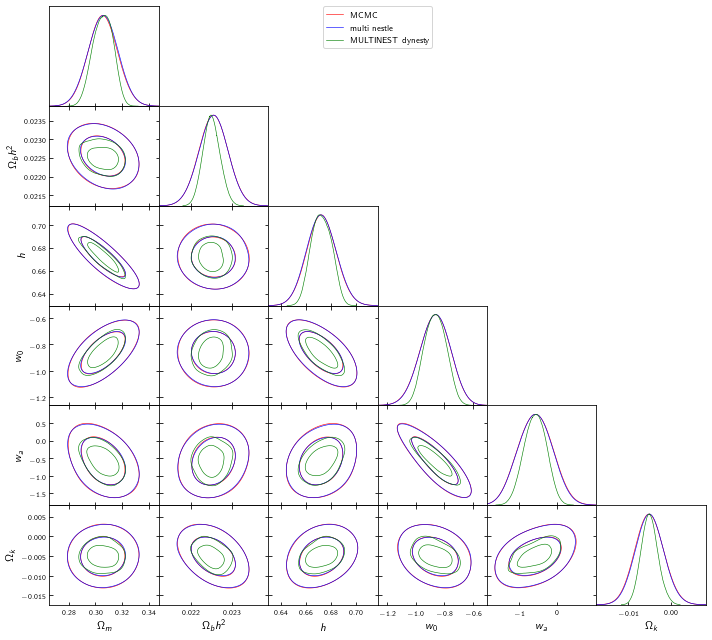

In [5]:
#g.settings.axes_fontsize = 5
g2.settings.lab_fontsize = 15


g2.triangle_plot(roots2, ['Om', 'Obh2', 'h','w','wa','Ok'], 
                diag1d_kwargs={'colors':['red','blue','green']},
                colors=['red','blue','green'],
                legend_labels=['MCMC', 'multi nestle',
                               'MULTINEST dynesty'], 
                filled = False, 
                normalized=False, shaded=False)
        
#plt.show()
plt.savefig('mcmcVSmulti.png')
plt.show()

# Buscando por qué difieren nestle y dynesty

In [21]:
#owaCDM_py_SN+HD+BBAO+Planck_mh_50000000
#owaCDM_py_SN+BBAO+HD+Planck_mcmc_[01:29:09]_5000000
#owaCDM_phy_SN+HD+BBAO+Planck_nested_[16:27:34]_multi_nested_1024.txt
#owaCDM_py_SN+BBAO+HD+Planck_nested_[17:58:18]_single_nested_1024
#multi normal owaCDM_py_SN+BBAO+HD+Planck_nested_[17:57:46]_multi_nested_1024
#owaCDM_phy_SN+HD+BBAO+Planck_nested_[10:35:36]_multi_nested_32
roots3 = [
          'sline_phy_dline_nested_[13:15:31]_nestle_multi_256',
          'sline_phy_dline_nested_[21:52:17]_dynesty_multi_256',
          'sline_phy_dline_nested_[12:58:22]_dynesty_multi_256'
          #'sline_phy_dline_nested_[17:54:11]_dynesty_multi_256'
          #'sline_phy_dline_nested_[23:53:48]_nestle_multi_256'#,
          #'sline_phy_dline_nested_[12:58:22]_dynesty_multi_256'
         ]

g3 = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.8,
                                             'smooth_scale_1D': 0.8, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

## El error era mío, estaba en usar resample_equal para los posterior samples en lugar de usar directamente result.samples

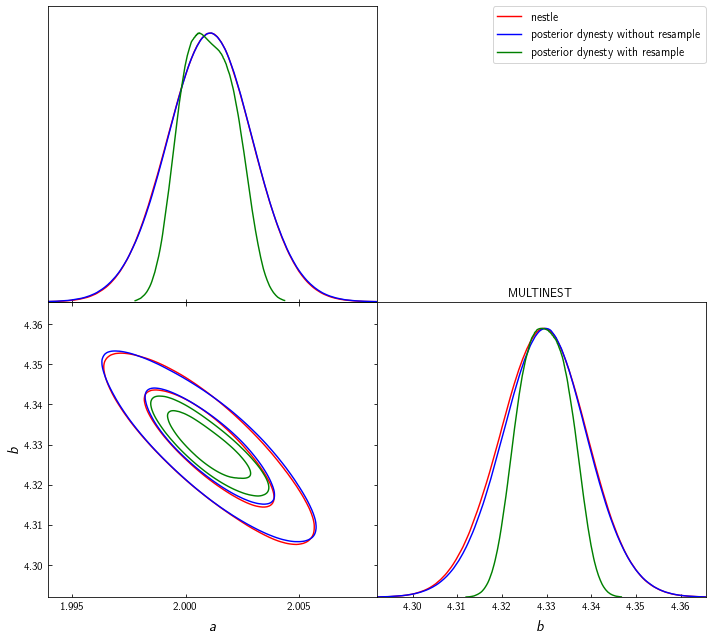

In [23]:
#g.settings.axes_fontsize = 5
g3.settings.lab_fontsize = 15

#mayor bootstrap muy alto 100 se hace angosto
#0 bootstrap mas angosto que 20

g3.triangle_plot(roots3, ['a', 'b'], 
                diag1d_kwargs={'colors':['red','blue','green']},
                colors=['red','blue','green'],
                legend_labels=['nestle', 'posterior dynesty without resample', 'posterior dynesty with resample'], 
                filled = False, 
                normalized=False, shaded=False)

plt.title("MULTINEST")
#plt.show()
plt.savefig('dynestyVSnestle.png')
plt.show()